# Final Project - reviews

## Importing all libraries

In [37]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score,classification_report
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics



## Part 1 - Intro

#### Subject Matter

The data is based upon average ratings of users grouped by different categories.
Few features in the data set describe the user attributes while the rest are ratings for various popular places :
churches, resorts, beaches, parks, museum, malls, zoo, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, dance clubs, swimming pools, gyms, bakeries, beauty and spas, cafes, view points, monuments and gardens. 

Main goal is to find out hidden trends for example, if a person has rated X feature with a high rating, how likely it is that he will rate Y feature high as well.


#### Breakdown of features and its types



### Features

Profile Age- Categorical variable which represents how long a user has existed.

User Gender- Categorical variable which represents users gender.

User Marital status- Categorical variable which represents users marital status.

Average ratings on churches- Continuous variable which represents average rating of user on churches between 0-5.

Average ratings on resorts- Continuous variable which represents average rating of user on resorts between 0-5.

Average ratings on beaches- Continuous variable which represents average rating of user on beaches between 0-5.

Average ratings on parks- Continuous variable which represents average rating of user on parks between 0-5.

Last User Rating on museum- Categorical variable which represents average ratings on museum between 0-5.

Average ratings on malls- Continuous variable which represents average rating of user on malls between 0-5.

Average ratings on zoo- Continuous variable which represents average rating of user on zoo between 0-5.

Average ratings on restaurants- Continuous variable which represents average rating of user on restaurants between 0-5.

Average ratings on pubs/bars- Continuous variable which represents average rating of user on pubs/bars between 0-5.

Average ratings on local services- Continuous variable which represents average rating of user on local services between 0-5.

Average ratings on burger/pizza shops- Continuous variable which represents average rating of user on burger/pizza shops between 0-5.

Average ratings on hotels/other lodgings- Continuous variable which represents average rating of user on hotels/other lodgings between 0-5.

Average ratings on dance clubs- Continuous variable which represents average rating of user on dance clubs between 0-5.

Average ratings on swimming pools- Continuous variable which represents average rating of user on swimming pools between 0-5.

Average ratings on gyms- Continuous variable which represents average rating of user on gyms between 0-5.

Average ratings on bakeries- Continuous variable which represents average rating of user on bakeries between 0-5.

Average ratings on beauty & spas- Continuous variable which represents average rating of user on beauty and spas between 0-5.

Average ratings on cafes- Continuous variable which represents average rating of user on cafes between 0-5.

Average ratings on view points- Continuous variable which represents average rating of user on view points between 0-5.

Average ratings on monuments- Continuous variable which represents average rating of user on monuments between 0-5.

Average ratings on gardens- Continuous variable which represents average rating of user on gardens between 0-5.




### Size of data set

In [2]:
csv = pd.read_csv('reviews3.csv')
reviews = csv
rows = len(reviews)
columns = len(reviews.columns)

In [3]:
print("There are",rows,"rows and",columns,"columns")


There are 5456 rows and 24 columns


## Part 2 - Initial Data Analysis


In [4]:
miss = round(reviews.isna().sum(),2)
print("Missing data count :",reviews.isna().sum().sum())
print(miss)


Missing data count : 1430
Profile Age       288
Gender            198
Marital Status     33
Category 1        213
Category 2          0
Category 3          0
Category 4        190
Category 5          0
Category 6          0
Category 7         31
Category 8          0
Category 9          0
Category 10        33
Category 11         1
Category 12         0
Category 13         0
Category 14       140
Category 15         0
Category 16         0
Category 17        91
Category 18       149
Category 19         0
Category 20        29
Category 21        34
dtype: int64


#### Handling Missing Data

Using the function isna(), I figured out the variables which have the missing values.
13 out of the 24 have some number of missing values which can influence our analysis.
Dealing with missing data is one of the most important part any analysis.
Their is no perfect solution for handling with missing data as it varies by each situation.
Their are multiple parameters to keep in mind before choosing the strategies to handle missing data.

The startegy I am going to use has 3 parts.
1 -> I am going to delete those observations based on the variables which contribute less than 100 missing values.
2 -> I am going to impute mean/median in the missing values where the variable is a continous variable.
3 -> missing values in the categorical variables, I am going to use the front/back fill aproach to impute the missing data.

In [5]:
reviews = reviews.dropna(subset=['Marital Status',
                                 'Category 7',
                                 'Category 10',
                                 'Category 11',
                                 'Category 17',
                                 'Category 20',
                                 'Category 21'])

In [6]:
reviews['Category 1'].fillna(reviews['Category 1'].mean(),inplace=True)
reviews['Category 4'].fillna(reviews['Category 4'].mean(),inplace=True)
reviews['Category 14'].fillna(reviews['Category 14'].mean(),inplace=True)
reviews['Category 18'].fillna(reviews['Category 18'].mean(),inplace=True)



/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
reviews = reviews.fillna(method='bfill')


In [8]:
# Making sure that their are no values outside the range of 0 and 5 so that their are no invalid values in the ratings variables

def invalid_val_remover(csv,column):
    csv = csv[(column >= 0) & (column <=5)]
    return csv
    
reviews['Category 10'] = reviews['Category 10'].astype('float')    
reviews = invalid_val_remover(reviews,reviews['Category 1'])
reviews = invalid_val_remover(reviews,reviews['Category 2'])
reviews = invalid_val_remover(reviews,reviews['Category 3'])
reviews = invalid_val_remover(reviews,reviews['Category 4'])
reviews = invalid_val_remover(reviews,reviews['Category 5'])
reviews = invalid_val_remover(reviews,reviews['Category 5'])
reviews = invalid_val_remover(reviews,reviews['Category 7'])
reviews = invalid_val_remover(reviews,reviews['Category 8'])
reviews = invalid_val_remover(reviews,reviews['Category 9'])
reviews = invalid_val_remover(reviews,reviews['Category 10'])
reviews = invalid_val_remover(reviews,reviews['Category 11'])
reviews = invalid_val_remover(reviews,reviews['Category 12'])
reviews = invalid_val_remover(reviews,reviews['Category 13'])
reviews = invalid_val_remover(reviews,reviews['Category 14'])
reviews = invalid_val_remover(reviews,reviews['Category 15'])
reviews = invalid_val_remover(reviews,reviews['Category 16'])
reviews = invalid_val_remover(reviews,reviews['Category 17'])
reviews = invalid_val_remover(reviews,reviews['Category 18'])
reviews = invalid_val_remover(reviews,reviews['Category 19'])
reviews = invalid_val_remover(reviews,reviews['Category 20'])
reviews = invalid_val_remover(reviews,reviews['Category 21'])


#new csv-file after initial data analysis
reviews.to_csv("new_reviews.csv", index=False)

   
    



#### Outliers:

Outliers is one of the common issues when performing data analysis. Not dealing with outliers can create some sort of biasness in the end result which might be wrong. Data driven decisions are highly depended on these kinds of data manipulation techniques to achieve high accuracy. Looking at the data we have, I beleieve that their are no blatant outliers in this data because 3 of the 24 features are categorical which cant be considered for outliers checking. The remaining 21 variables are continous variablles but they are with a range of 0-5 i.e the ratings of a specifc place. When data is within the specific range set then their cant be any outliers in them.

## Part 3 - Exploratory Data Analysis


#### Co Relation Among Features

In [9]:
reviews.corr(method= 'kendall')

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21
Category 1,1.000000,0.324555,0.188158,0.128182,0.058471,-0.210912,-0.118797,-0.255197,-0.190258,-0.169213,...,-0.155252,-0.225835,0.112384,0.099944,0.075422,0.122681,0.241114,0.413159,0.529759,0.640332
Category 2,0.324555,1.000000,0.365903,0.174322,0.140175,-0.107967,-0.059830,-0.127322,-0.151614,-0.148865,...,-0.101931,-0.122794,0.045103,0.080609,0.089551,0.159726,0.199587,0.147503,0.201153,0.252945
Category 3,0.188158,0.365903,1.000000,0.365527,0.284925,-0.090939,-0.162825,-0.223107,-0.222376,-0.154638,...,-0.060467,-0.067377,0.015189,0.021752,0.038943,0.065316,0.083132,0.117816,0.160719,0.160274
Category 4,0.128182,0.174322,0.365527,1.000000,0.572020,-0.006943,-0.056197,-0.135054,-0.135025,-0.152381,...,-0.117070,-0.175649,-0.093022,-0.140264,-0.156158,-0.058241,-0.040072,0.160916,0.139511,0.148367
Category 5,0.058471,0.140175,0.284925,0.572020,1.000000,0.103653,0.045937,-0.094382,-0.085917,-0.132246,...,-0.095748,-0.202166,-0.143627,-0.199887,-0.224842,-0.145513,-0.076086,0.064868,0.057848,0.069649
Category 6,-0.210912,-0.107967,-0.090939,-0.006943,0.103653,1.000000,0.357663,0.363055,0.192714,0.087430,...,0.104344,0.096348,-0.235043,-0.223856,-0.192207,-0.127598,-0.064745,-0.201857,-0.140788,-0.234182
Category 7,-0.118797,-0.059830,-0.162825,-0.056197,0.045937,0.357663,1.000000,0.485867,0.498924,0.287555,...,0.075801,0.031934,-0.215649,-0.267101,-0.280126,-0.233215,-0.174714,-0.131465,-0.085026,-0.088137
Category 8,-0.255197,-0.127322,-0.223107,-0.135054,-0.094382,0.363055,0.485867,1.000000,0.526012,0.264938,...,0.091993,0.097692,-0.262486,-0.265148,-0.229348,-0.164899,-0.093958,-0.177581,-0.165910,-0.249696
Category 9,-0.190258,-0.151614,-0.222376,-0.135025,-0.085917,0.192714,0.498924,0.526012,1.000000,0.507109,...,0.147465,0.068815,-0.197081,-0.254748,-0.269232,-0.233451,-0.239422,-0.157815,-0.145405,-0.175216
Category 10,-0.169213,-0.148865,-0.154638,-0.152381,-0.132246,0.087430,0.287555,0.264938,0.507109,1.000000,...,0.286994,0.138200,0.037888,-0.057568,-0.117776,-0.210123,-0.305277,-0.197066,-0.208077,-0.151388


### Feature Analysis

#### User Distribution

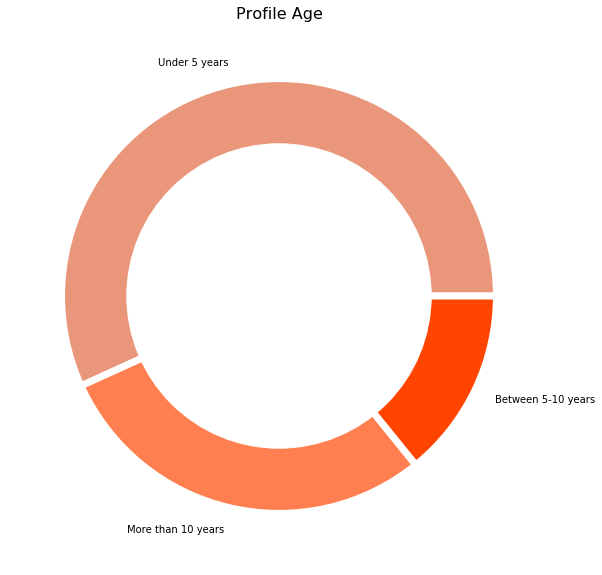

In [10]:

names = ['Under 5 years','More than 10 years','Between 5-10 years']
size = [reviews['Profile Age'].value_counts()[0],reviews['Profile Age'].value_counts()[1],reviews['Profile Age'].value_counts()[2]]

# Creating circle for the center of the plot

m_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(size, labels=names, colors=['darksalmon','coral','orangered'],wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(m_circle)
plt.title("Profile Age",fontsize=16)
plt.show()

    

According to the chart, most of the profiles were made under 5 years followed by the profiles which older than 10 years

#### Gender

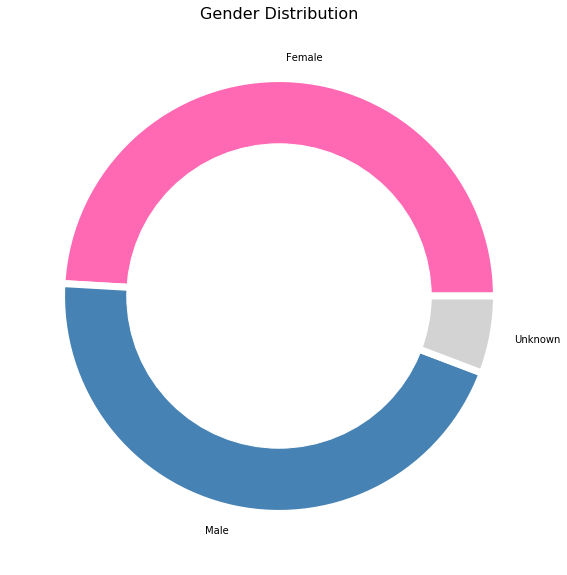

In [11]:
names = ['Female','Male','Unknown']
size=[reviews['Gender'].value_counts()[0],reviews['Gender'].value_counts()[1],reviews['Gender'].value_counts()[2]]

# Creating a circle for the center of the plot

m_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(size, labels=names,  colors=['hotpink','steelblue','lightgray'],wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(m_circle)
plt.title("Gender Distribution",fontsize=16)
plt.show()


#### Marital Status

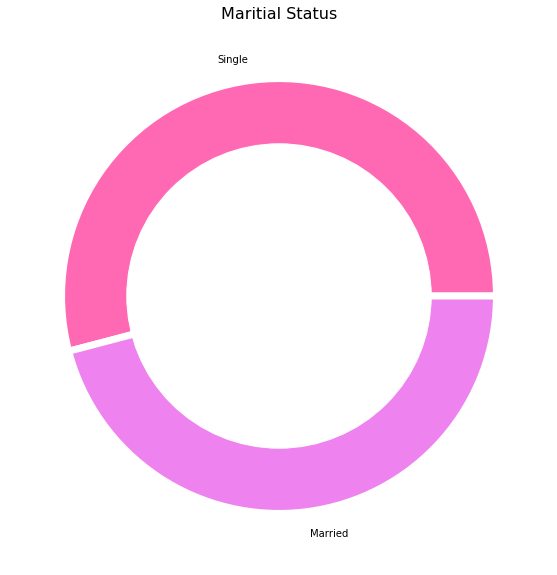

In [12]:
names = ['Single','Married']
size=[reviews['Marital Status'].value_counts()[0],reviews['Marital Status'].value_counts()[1]]
 
# Create a circle for the center of the plot
m_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(size, labels=names,  colors=['hotpink','violet'],wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(m_circle)
plt.title("Maritial Status",fontsize=16)
plt.show()


#### Average rating of Churches

The average rating is : 1.4
The maximum rating for Churches : 5.0
The minimum rating for Churches : 0.0


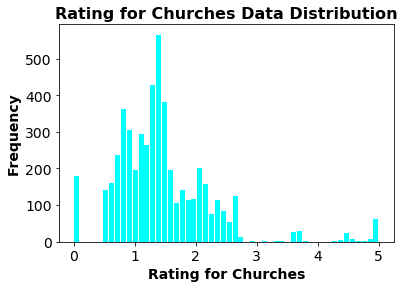

In [13]:
print("The average rating is :",round(reviews['Category 1'].median(),1))
print("The maximum rating for Churches :",round(reviews['Category 1'].max(),1))
print("The minimum rating for Churches :",round(reviews['Category 1'].min(),1))

plt.hist(reviews['Category 1'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Churches', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)
 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Rating for Churches Data Distribution",fontsize=16,fontweight='bold')
plt.show()



#### Average rating of Resort

The average rating is : 1.9
The maximum rating for Resort is : 5.0
The minimum rating for Resort is : 0.0


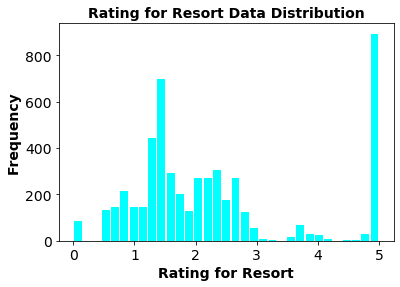

In [14]:
#### Average rating of Resort

print("The average rating is :",round(reviews['Category 2'].median(),1))
print("The maximum rating for Resort is :",round(reviews['Category 2'].max(),1))
print("The minimum rating for Resort is :",round(reviews['Category 2'].min(),1))

plt.hist(reviews['Category 2'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Resort', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)
 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Resort Data Distribution",fontsize=14,fontweight='bold')
plt.show()



#### Average rating of Beaches

The average rating for Beaches is : 2.1
The maximum rating for Beaches is : 5.0
The minimum rating for Beaches is : 0.0


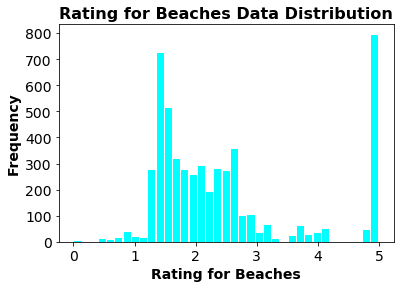

In [15]:
#### Average rating of Resort

print("The average rating for Beaches is :",round(reviews['Category 3'].median(),1))
print("The maximum rating for Beaches is :",round(reviews['Category 3'].max(),1))
print("The minimum rating for Beaches is :",round(reviews['Category 3'].min(),1))

plt.hist(reviews['Category 3'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Beaches', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)
 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Beaches Data Distribution",fontsize=16,fontweight='bold')
plt.show()


#### Average Ratings of Park

The average rating for Parks is : 2.5
The maximum rating for Parks is : 5.0
The minimum rating for Parks is : 0.8


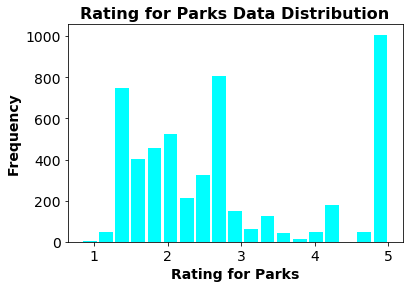

In [16]:
#### Average rating of Park

print("The average rating for Parks is :",round(reviews['Category 4'].median(),1))
print("The maximum rating for Parks is :",round(reviews['Category 4'].max(),1))
print("The minimum rating for Parks is :",round(reviews['Category 4'].min(),1))

plt.hist(reviews['Category 4'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Parks', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Parks Data Distribution",fontsize=16,fontweight='bold')
plt.show()


#### Average Rating for Museum

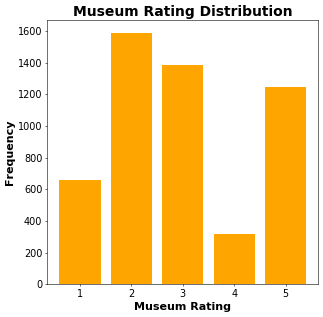

In [17]:
counts = reviews['Category 5'].value_counts()
index = counts.index

f, x = plt.subplots(figsize=(7,7), dpi=50)

x.bar(index,counts, align='center', color='orange')

x.set_ylabel("Count")
x.set_title("Museum Rating Distribution",fontweight='bold',fontsize= "20")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

x.set_ylabel("Frequency" ,fontsize=16,fontweight='bold')
x.set_xlabel("Museum Rating" ,fontsize=16,fontweight='bold')

x

#### Average Rating for Malls

The average rating for Malls is : 3.2
The maximum rating for Malls is : 5.0
The minimum rating for Malls is : 1.1


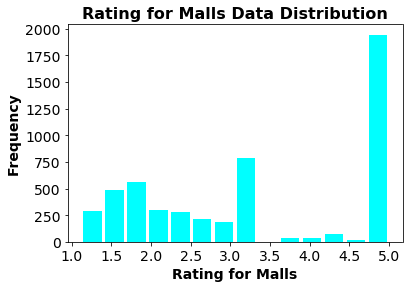

In [18]:
#### Average rating of Malls

print("The average rating for Malls is :",round(reviews['Category 6'].median(),1))
print("The maximum rating for Malls is :",round(reviews['Category 6'].max(),1))
print("The minimum rating for Malls is :",round(reviews['Category 6'].min(),1))

plt.hist(reviews['Category 6'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Malls', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Malls Data Distribution",fontsize=16,fontweight='bold')
plt.show()


#### Average Rating for Zoo

The average rating for Zoo is : 2.2
The maximum rating for Zoo is : 5.0
The minimum rating for Zoo is : 0.9


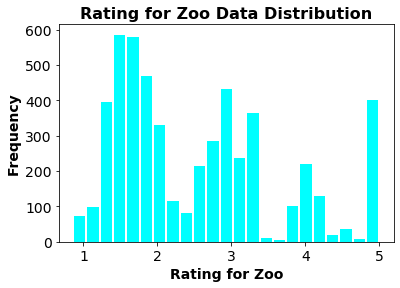

In [19]:
#### Average rating of Zoo

print("The average rating for Zoo is :",round(reviews['Category 7'].median(),1))
print("The maximum rating for Zoo is :",round(reviews['Category 7'].max(),1))
print("The minimum rating for Zoo is :",round(reviews['Category 7'].min(),1))

plt.hist(reviews['Category 7'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Zoo', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Zoo Data Distribution",fontsize=16,fontweight='bold')
plt.show()


#### Average rating of Restaurants

The average rating for Restaurants is : 2.8
The maximum rating for Restaurants is : 5.0
The minimum rating for Restaurants is : 0.8


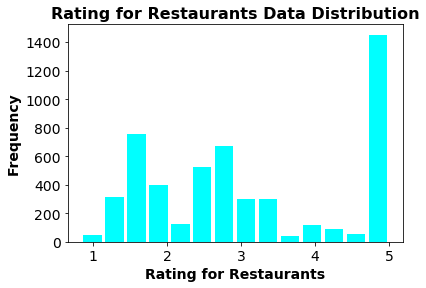

In [20]:
print("The average rating for Restaurants is :",round(reviews['Category 8'].median(),1))
print("The maximum rating for Restaurants is :",round(reviews['Category 8'].max(),1))
print("The minimum rating for Restaurants is :",round(reviews['Category 8'].min(),1))

plt.hist(reviews['Category 8'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Restaurants', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Restaurants Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average rating for Pubs/Bars

The average rating for Pubs/Bars is : 2.7
The maximum rating for Pubs/Bars is : 5.0
The minimum rating for Pubs/Bars is : 0.8


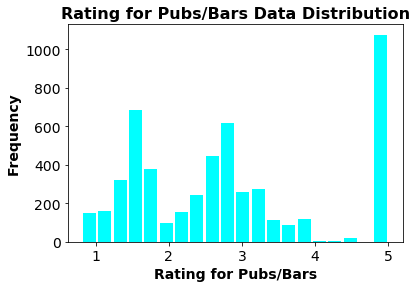

In [21]:
print("The average rating for Pubs/Bars is :",round(reviews['Category 9'].median(),1))
print("The maximum rating for Pubs/Bars is :",round(reviews['Category 9'].max(),1))
print("The minimum rating for Pubs/Bars is :",round(reviews['Category 9'].min(),1))

plt.hist(reviews['Category 9'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Pubs/Bars', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Pubs/Bars Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating for Local services



The average rating for Local services is : 2.0
The maximum rating for Local services is : 5.0
The minimum rating for Local services is : 0.8


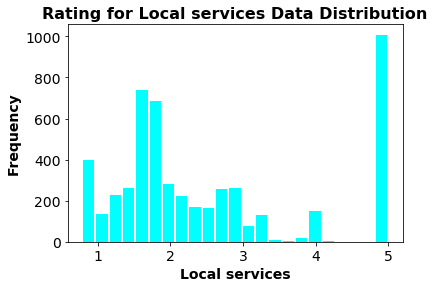

In [22]:
print("The average rating for Local services is :",round(reviews['Category 10'].median(),1))
print("The maximum rating for Local services is :",round(reviews['Category 10'].max(),1))
print("The minimum rating for Local services is :",round(reviews['Category 10'].min(),1))

plt.hist(reviews['Category 10'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Local services', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Local services Data Distribution",fontsize=16,fontweight='bold')
plt.show()


#### Average Rating for Burger/Pizza Shops

The average rating for Burger/Pizza Shops is : 1.7
The maximum rating for Burger/Pizza Shops is : 5.0
The minimum rating for Burger/Pizza Shops is : 0.8


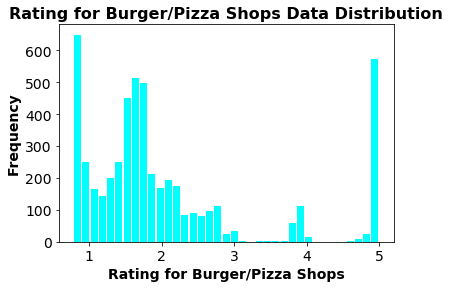

In [23]:
print("The average rating for Burger/Pizza Shops is :",round(reviews['Category 11'].median(),1))
print("The maximum rating for Burger/Pizza Shops is :",round(reviews['Category 11'].max(),1))
print("The minimum rating for Burger/Pizza Shops is :",round(reviews['Category 11'].min(),1))

plt.hist(reviews['Category 11'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Burger/Pizza Shops', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Burger/Pizza Shops Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating for Hotels/Lodges

The average rating for Hotels/Lodges Shops is : 1.6
The maximum rating for Hotels/Lodges Shops is : 5.0
The minimum rating for Hotels/Lodges Shops is : 0.8


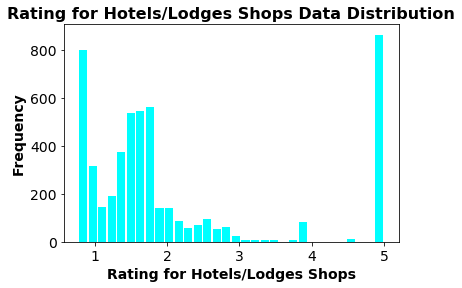

In [24]:
print("The average rating for Hotels/Lodges Shops is :",round(reviews['Category 12'].median(),1))
print("The maximum rating for Hotels/Lodges Shops is :",round(reviews['Category 12'].max(),1))
print("The minimum rating for Hotels/Lodges Shops is :",round(reviews['Category 12'].min(),1))

plt.hist(reviews['Category 12'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Hotels/Lodges Shops', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)
 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Hotels/Lodges Shops Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating for Dance Clubs

The average rating for Dance Clubs is : 1.5
The maximum rating for Dance Clubs is : 5.0
The minimum rating for Dance Clubs is : 0.8


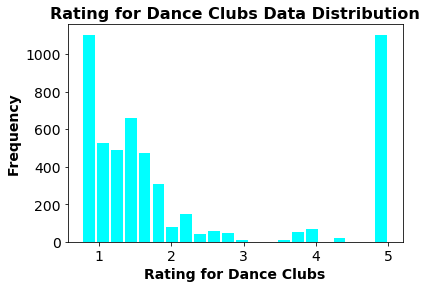

In [25]:
print("The average rating for Dance Clubs is :",round(reviews['Category 13'].median(),1))
print("The maximum rating for Dance Clubs is :",round(reviews['Category 13'].max(),1))
print("The minimum rating for Dance Clubs is :",round(reviews['Category 13'].min(),1))

plt.hist(reviews['Category 13'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Dance Clubs', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Dance Clubs Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average ratings on Swimming Pools

The average rating for Swimming Pools is : 0.7
The maximum rating for Swimming Pools is : 5.0
The minimum rating for Swimming Pools is : 0.0


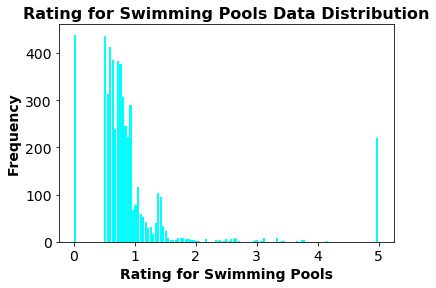

In [26]:
print("The average rating for Swimming Pools is :",round(reviews['Category 14'].median(),1))
print("The maximum rating for Swimming Pools is :",round(reviews['Category 14'].max(),1))
print("The minimum rating for Swimming Pools is :",round(reviews['Category 14'].min(),1))

plt.hist(reviews['Category 14'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Swimming Pools', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Swimming Pools Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating on Gyms

The average rating for Gyms is : 0.7
The maximum rating for Gyms is : 5.0
The minimum rating for Gyms is : 0.0


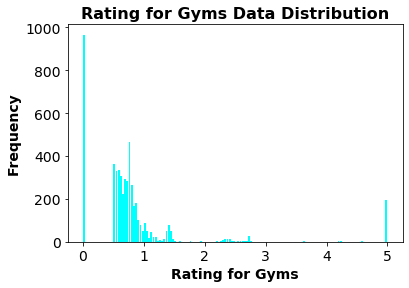

In [27]:
print("The average rating for Gyms is :",round(reviews['Category 15'].median(),1))
print("The maximum rating for Gyms is :",round(reviews['Category 15'].max(),1))
print("The minimum rating for Gyms is :",round(reviews['Category 15'].min(),1))

plt.hist(reviews['Category 15'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Rating for Gyms', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Gyms Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating on Bakeries

The average rating for Bakeries is : 0.7
The maximum rating for Bakeries is : 5.0
The minimum rating for Bakeries is : 0.0


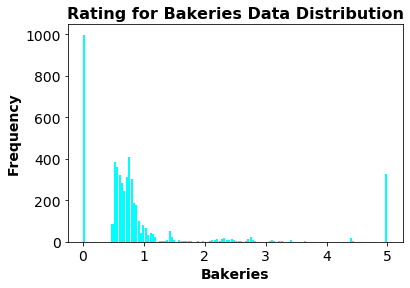

In [28]:
print("The average rating for Bakeries is :",round(reviews['Category 16'].median(),1))
print("The maximum rating for Bakeries is :",round(reviews['Category 16'].max(),1))
print("The minimum rating for Bakeries is :",round(reviews['Category 16'].min(),1))

plt.hist(reviews['Category 16'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Bakeries', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Bakeries Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating on Beauty and Spas

The average rating for Beauty and Spas is : 0.7
The maximum rating for Beauty and Spas is : 5.0
The minimum rating for Beauty and Spas is : 0.0


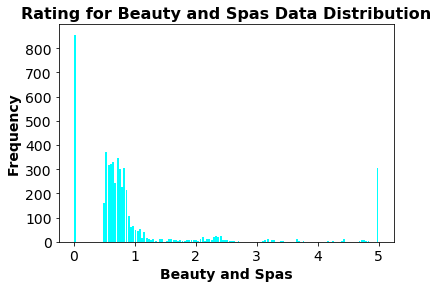

In [29]:
print("The average rating for Beauty and Spas is :",round(reviews['Category 17'].median(),1))
print("The maximum rating for Beauty and Spas is :",round(reviews['Category 17'].max(),1))
print("The minimum rating for Beauty and Spas is :",round(reviews['Category 17'].min(),1))

plt.hist(reviews['Category 17'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Beauty and Spas', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Beauty and Spas Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating on Cafes

The average rating for Cafes is : 0.8
The maximum rating for Cafes is : 5.0
The minimum rating for Cafes is : 0.0


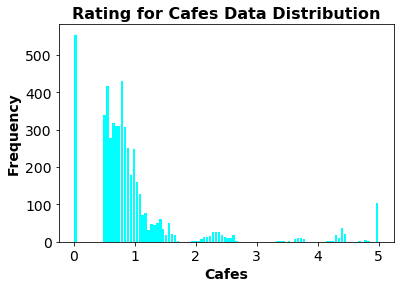

In [30]:
print("The average rating for Cafes is :",round(reviews['Category 18'].median(),1))
print("The maximum rating for Cafes is :",round(reviews['Category 18'].max(),1))
print("The minimum rating for Cafes is :",round(reviews['Category 18'].min(),1))

plt.hist(reviews['Category 18'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Cafes', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Cafes Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating on View Points

The average rating for View Points is : 1.0
The maximum rating for View Points is : 5.0
The minimum rating for View Points is : 0.0


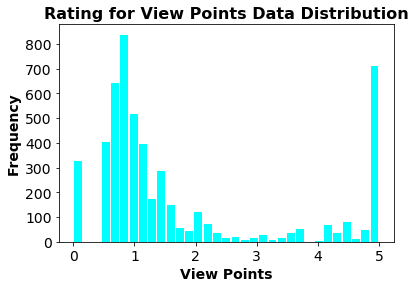

In [31]:
print("The average rating for View Points is :",round(reviews['Category 19'].median(),1))
print("The maximum rating for View Points is :",round(reviews['Category 19'].max(),1))
print("The minimum rating for View Points is :",round(reviews['Category 19'].min(),1))

plt.hist(reviews['Category 19'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('View Points', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for View Points Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating on Monuments



The average rating for Monuments is : 1.1
The maximum rating for Monuments is : 5.0
The minimum rating for Monuments is : 0.0


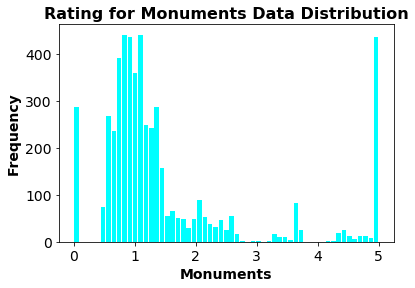

In [32]:
print("The average rating for Monuments is :",round(reviews['Category 20'].median(),1))
print("The maximum rating for Monuments is :",round(reviews['Category 20'].max(),1))
print("The minimum rating for Monuments is :",round(reviews['Category 20'].min(),1))

plt.hist(reviews['Category 20'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Monuments', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Monuments Data Distribution",fontsize=16,fontweight='bold')
plt.show()

#### Average Rating on Gardens

The average rating for Gardens is : 1.3
The maximum rating for Gardens is : 5.0
The minimum rating for Gardens is : 0.0


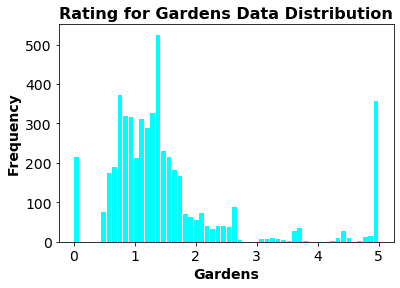

In [33]:
print("The average rating for Gardens is :",round(reviews['Category 21'].median(),1))
print("The maximum rating for Gardens is :",round(reviews['Category 21'].max(),1))
print("The minimum rating for Gardens is :",round(reviews['Category 21'].min(),1))

plt.hist(reviews['Category 21'],bins='auto',color='cyan',rwidth=0.85)

plt.xlabel('Gardens', fontweight='bold',fontsize=14)
plt.ylabel('Frequency', fontweight='bold',fontsize=14)

 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Rating for Gardens Data Distribution",fontsize=16,fontweight='bold')
plt.show()

## Part 4 - Classification Model


#### Gaussian Naive Bayes Classifier
##### We will train the algorithm according to the ranking of parks and churches,
##### Our goal is to rank the museums.
##### We would like to predict given the rating of the parks and the churches the rating of the museum (integer between 0 and 5)

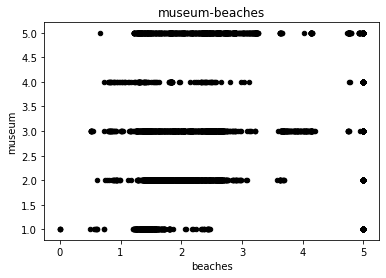

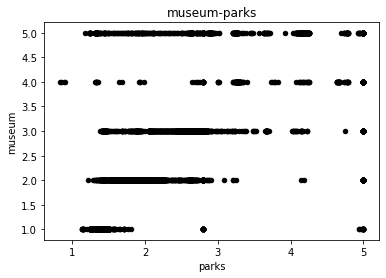

Classification Report :
              precision    recall  f1-score   support

           1       0.58      0.09      0.16       119
           2       0.43      0.85      0.57       344
           3       0.76      0.10      0.17       295
           4       0.00      0.00      0.00        51
           5       0.47      0.61      0.53       231

    accuracy                           0.46      1040
   macro avg       0.45      0.33      0.29      1040
weighted avg       0.53      0.46      0.38      1040

accuracy score 0.4576923076923077


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


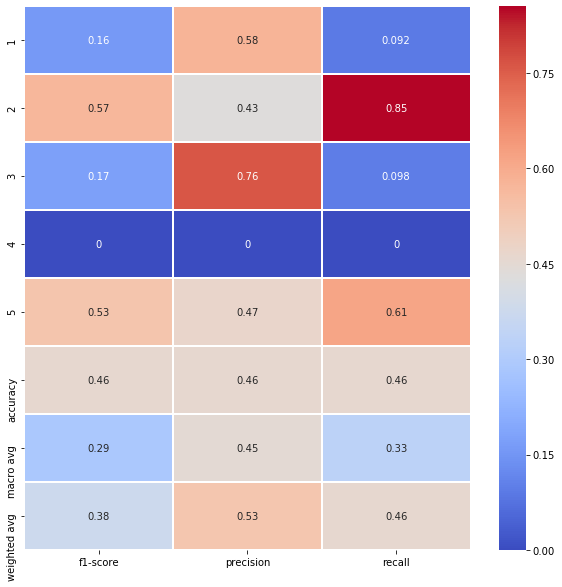

In [34]:

reviews.plot.scatter(x='Category 3', y='Category 5',color='black' )
plt.title("museum-beaches")
plt.xlabel("beaches")
plt.ylabel("museum")
reviews.plot.scatter(x='Category 4', y='Category 5',color='black' )
plt.title("museum-parks")
plt.xlabel("parks")
plt.ylabel("museum")
plt.show()


Gaussian_Naive_bayes = GaussianNB()
Xtrain, Xtest, ytrain, ytest = train_test_split(reviews.iloc[:,[5,6]],reviews.iloc[:,7], test_size=0.2, random_state=6)
predicted_y = Gaussian_Naive_bayes.fit(Xtrain, ytrain).predict(Xtest)
cr = classification_report(ytest, predicted_y,output_dict=True)
print("Classification Report :")
print(classification_report(ytest, predicted_y))
print("accuracy score",metrics.accuracy_score(ytest, predicted_y))

f, x = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=x,cmap='coolwarm',linewidths=1)

#### Decision Tree (Part One)
##### We will train the algorithm according with all the features.
##### Our goal still be the rank of the museum.

Classification Report :
              precision    recall  f1-score   support

           1       0.85      0.89      0.87       452
           2       0.75      0.83      0.79      1003
           3       0.79      0.61      0.69       883
           4       0.57      0.61      0.59       205
           5       0.62      0.66      0.64       792

    accuracy                           0.73      3335
   macro avg       0.72      0.72      0.71      3335
weighted avg       0.73      0.73      0.73      3335

accuracy score 0.7271364317841079


4169

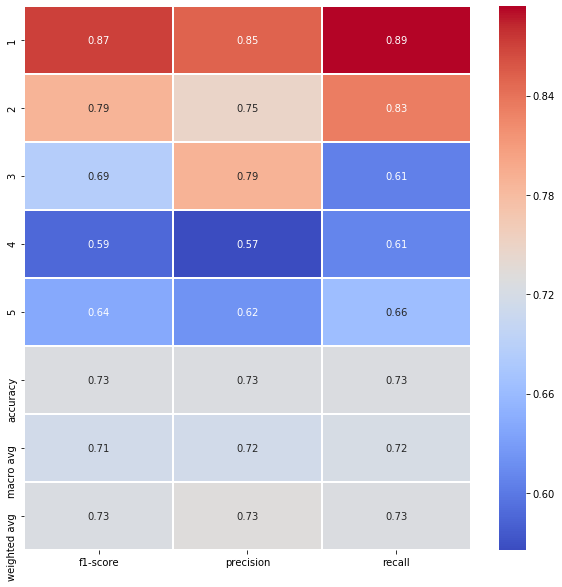

In [35]:
csv = csv.dropna()
csv["Profile Age"] = csv["Profile Age"].astype('category')
csv["Profile Age_Encoded"] = csv["Profile Age"].cat.codes
csv["Gender"] = csv["Gender"].astype('category')
csv["Gender_encoded"] = csv["Gender"].cat.codes
csv["Marital Status"] = csv["Marital Status"].astype('category')
csv["Marital Status_encoded"] = csv["Marital Status"].cat.codes
# Splitting the data into test and train while using all the features
X = csv.iloc[:,[3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
y = csv.iloc[:,7]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=60)
from sklearn.tree import DecisionTreeClassifier
D_T = DecisionTreeClassifier(max_depth=3, random_state=1)
D_T.fit(Xtrain, ytrain)
cr = classification_report(ytrain, D_T.predict(Xtrain),output_dict=True)
print("Classification Report :")
print(classification_report(ytrain, D_T.predict(Xtrain)))

print("accuracy score",metrics.accuracy_score(ytrain, D_T.predict(Xtrain)))
f, x = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=x,cmap='coolwarm',linewidths=1)
len(csv)

#### Decision Tree (Part Two)
##### We will train the algorithm according the 4 most relevant features.
##### Our goal still be the rank of the museum.

Classification Report :
              precision    recall  f1-score   support

           1       0.83      0.81      0.82       523
           2       0.69      0.86      0.77      1265
           3       0.79      0.56      0.66      1134
           4       0.51      0.53      0.52       253
           5       0.60      0.62      0.61       982

    accuracy                           0.69      4157
   macro avg       0.69      0.68      0.67      4157
weighted avg       0.70      0.69      0.69      4157

accuracy score 0.6940101034399807


4169

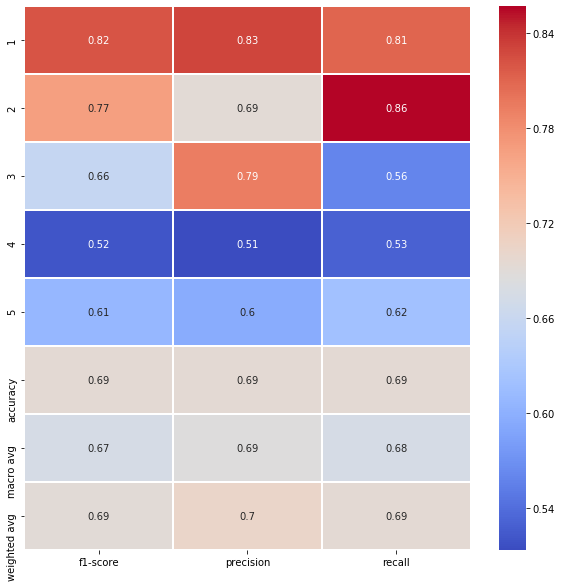

In [36]:
X = reviews.iloc[:,[6,19,22,5]]
y = reviews.iloc[:,7]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=60)
D_T = DecisionTreeClassifier(max_depth=3, random_state=1)
D_T.fit(Xtrain, ytrain)
cr = classification_report(ytrain, D_T.predict(Xtrain),output_dict=True)
print("Classification Report :")
print(classification_report(ytrain, D_T.predict(Xtrain)))
print("accuracy score",metrics.accuracy_score(ytrain, D_T.predict(Xtrain)))

f, x = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=x,cmap='coolwarm',linewidths=1)
len(csv)

Looking at the results of the classification report of both models(Gaussian Naive Bayes Classifier and Decision Tree).
The information I received is better to use a decision tree algorithm.
I got the highest accuracy score when i selected all the features.
But the second decision tree model had only 4 relevant features selected along with imputation of missing values which makes the data less accurate so looking  at the bigger picture, the second model seems to give better results compared to the first one.

## Part 5 - Summary


The data set was fascinating.
I could see the different ratings for different users.
The data set was particularly challenging, it was necessary to use the knowledge I acquired during the course to succeed in the task and analyze the information.
The data set allowed me to be creative and use different graphs and simulations.
The data set is more suitable for decision tree algorithms than for GNB,
Since a decision tree gives a higher accuracy score,
Which helps to predict and make better decisions.
